In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


First 5 rows of the dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


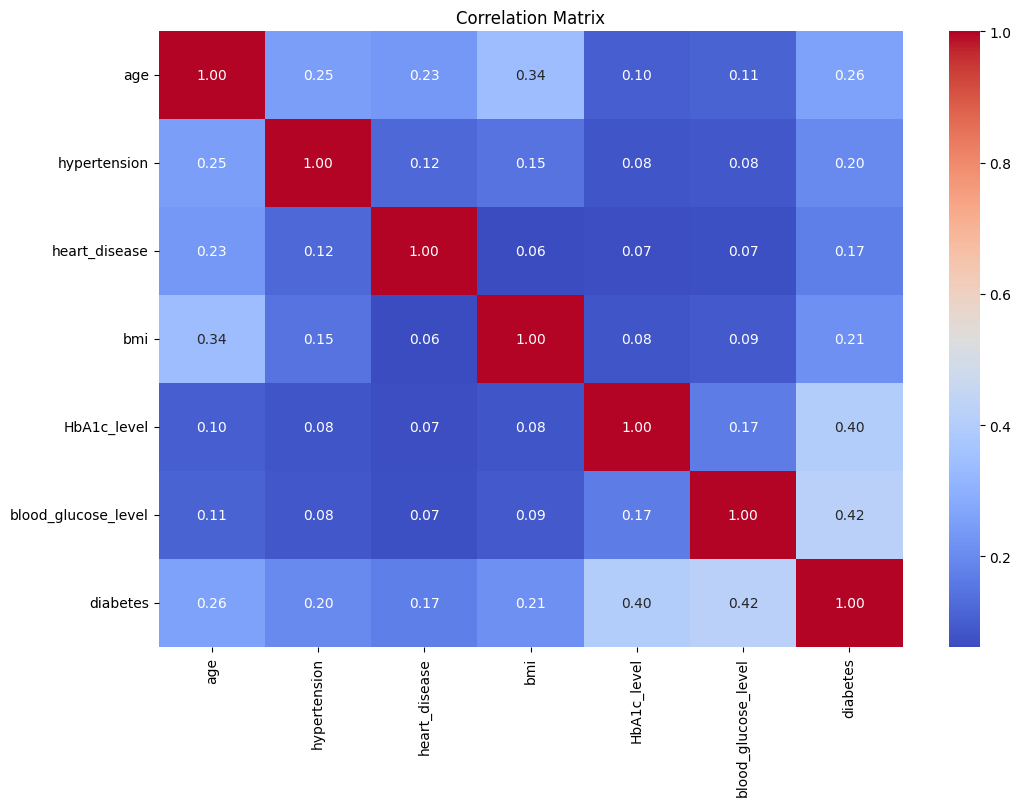

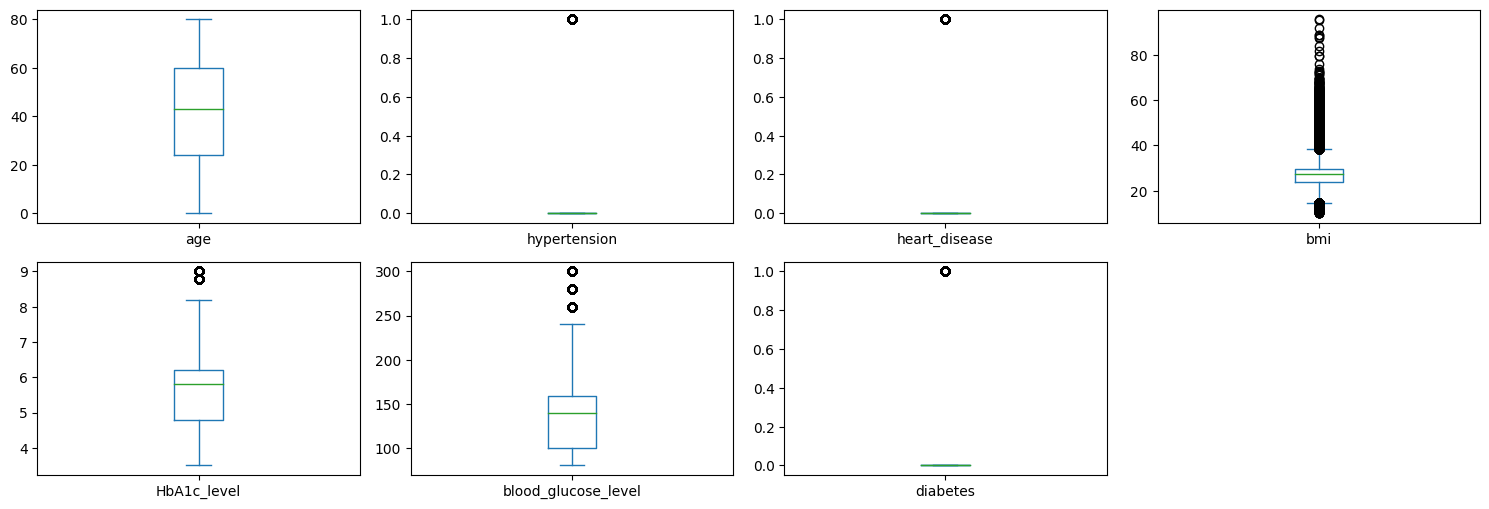

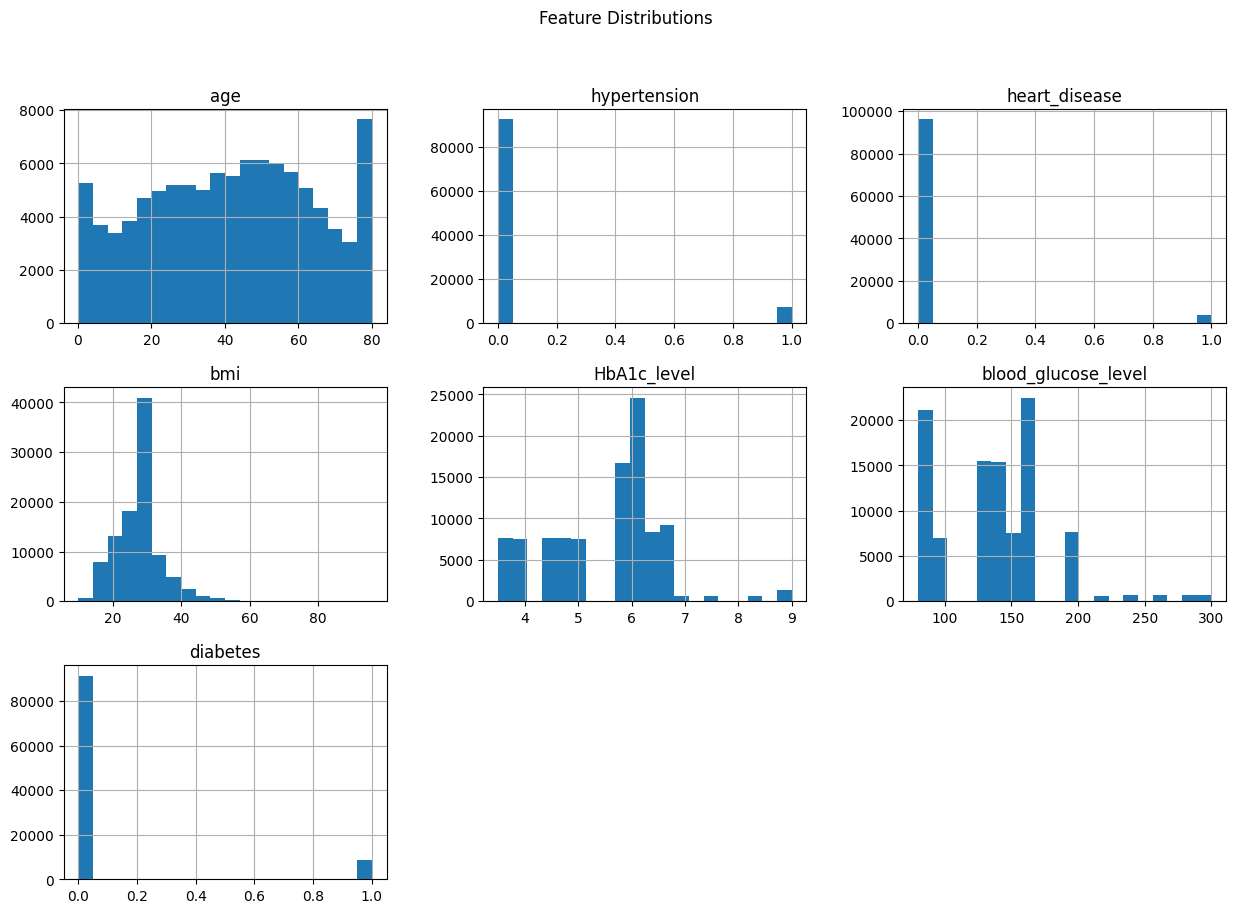

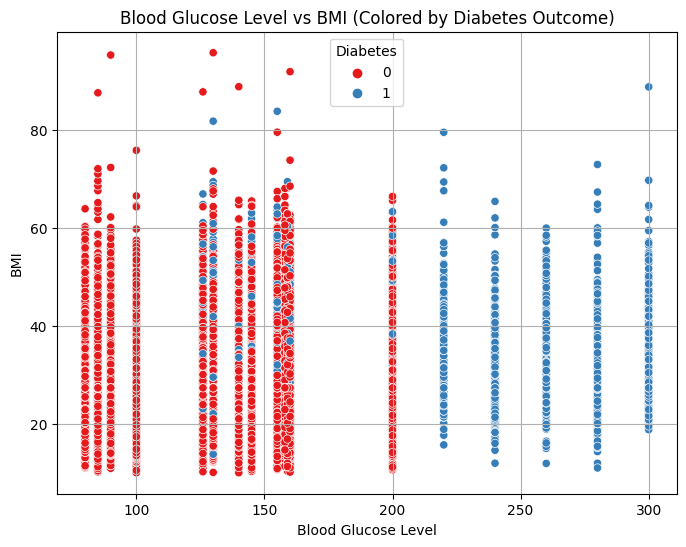

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import random

# Set the random seeds for reproducibility
random.seed(42)
np.random.seed(42)

# Load the dataset
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

print("First 5 rows of the dataset:")
print(df.head())

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Boxplot for all numerical columns
df.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


#histogram
df.hist(figsize=(15,10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='blood_glucose_level', y='bmi', hue='diabetes', palette='Set1')
plt.title('Blood Glucose Level vs BMI (Colored by Diabetes Outcome)')
plt.xlabel('Blood Glucose Level')
plt.ylabel('BMI')
plt.legend(title='Diabetes')
plt.grid(True)
plt.show()




In [19]:
# Encode categorical features
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

# Handle missing values if any
df = df.fillna(df.mean())

# Split features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Random Forest Model ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]


Random Forest Evaluation:
Accuracy: 0.9708
Precision: 0.9532
Recall: 0.6915
F1-Score: 0.8015
AUC-ROC: 0.9637


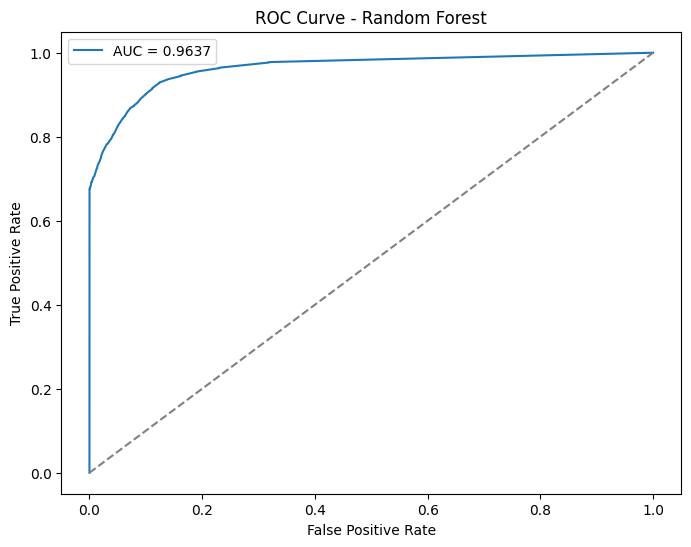

Confusion Matrix for Random Forest:
[[18234    58]
 [  527  1181]]


In [20]:
# --- Evaluation ---
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
auc_roc = roc_auc_score(y_test, y_pred_prob_rf)

print(f"Random Forest Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix for Random Forest:")
print(cm)

In [18]:
# --- Prediction for a Sample Input ---
sample_input = {
    'age': 50,
    'gender': 1,  # Male if encoded as 1
    'hypertension': 0,
    'heart_disease': 0,
    'smoking_history': 2,  # Depends on your encoding
    'bmi': 27.5,
    'HbA1c_level': 6.2,
    'blood_glucose_level': 180
}

input_df = pd.DataFrame([sample_input])
input_df = input_df[X.columns]  # Ensure the order matches the model's training
input_scaled = scaler.transform(input_df)

prediction_rf = rf_model.predict(input_scaled)
prediction_proba_rf = rf_model.predict_proba(input_scaled)[0][1]

outcome_rf = 'Diabetic' if prediction_rf[0] == 1 else 'Non-Diabetic'
print("\n--- Prediction Results ---")
print(f"Random Forest Outcome: {outcome_rf} - Probability: {prediction_proba_rf:.4f}")


--- Prediction Results ---
Random Forest Outcome: Non-Diabetic - Probability: 0.0300
